# Regression

# AIRBNB Price Prediction in NYC


In this kernel we are focusing Price Prediction of New York City Airbnb Open Data Airbnb listings and metrics in NYC, NY, USA (2019)for linear regression.

Data
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019. This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

This data contains 16 columns, 4852 unique values(samples). Imported all necessary files and libraries, We removed unnecessary data from the datset like last review, reviews per month and host name as they donot support the data required. We filled the null values with zero constant and did the visualization using seaborn, pyplot, matplotlib.

Variables
id: listing ID
name: name of the listing
host_id: host ID
host_name: name of the host
neighbourhood_group: location
neighbourhood: area
latitude: latitude coordinateslatitude: latitude coordinates
longitude: longitude coordinates
room_type: listing space type
price: price in dollars
minimum_nights: amount of nights minimum
number_of_reviews: number of reviews
last_review: latest review
reviews_per_month: number of reviews per month
calculated_host_listings_count: amount of listing per host
availability_365: number of days when listing is available for booking

We will perform Regression on this dataset.

# Exploratory Data Analysis

##### The focus of this notebook is on cleaning the data and running our regression model. The strategy employed for cleaning the data is as follows:

Drop columns that are not relevant to the problem. Example: URL, host picture etc.
Find missing values for each column.
Drop columns which have more than 20% missing data. Make a note of the columns.
Convert columns to their correct data type.
Subset the dataset based on certain criterion. Ex: property_type = Apartment/House/Townhouse/Condo
One-hot-encode the categorical variables.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [2]:
NYC_data = pd.read_csv('NYC_AirBNB.csv')

In [3]:
NYC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4852 entries, 0 to 4851
Data columns (total 30 columns):
Unnamed: 0                4852 non-null int64
id                        4852 non-null int64
log_price                 4852 non-null float64
property_type             4852 non-null object
room_type                 4852 non-null object
amenities                 4852 non-null object
accommodates              4852 non-null int64
bathrooms                 4838 non-null float64
bed_type                  4852 non-null object
cancellation_policy       4852 non-null object
cleaning_fee              4852 non-null object
city                      4852 non-null object
description               4852 non-null object
first_review              3833 non-null object
host_has_profile_pic      4814 non-null object
host_identity_verified    4814 non-null object
host_response_rate        3348 non-null object
host_since                4814 non-null object
instant_bookable          4852 non-null object
l

In [4]:
NYC_data.head()

,Unnamed: 0,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,16553,44472,4.382027,Condominium,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,...,40.762239,-73.981589,Luxury bedroom in Times Square,Times Square/Theatre District,1,NaN,https://a0.muscache.com/im/pictures/101584608/...,10019,1.0,1.0
1,12555,7007348,5.075174,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,strict,...,40.677892,-73.992054,Stylish and bright one bedroom,Gowanus,17,98.0,https://a0.muscache.com/im/pictures/cc7d769d-9...,11231,1.0,2.0
2,15012,10283574,4.852030,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,...,40.741380,-73.998753,Sunny Chelsea Studio,Chelsea,6,93.0,https://a0.muscache.com/im/pictures/2a690ce6-2...,NaN,0.0,2.0
3,21502,1754527,5.010635,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,strict,...,40.800331,-73.965090,BEAUTIFUL 1BR APT ON THE UPPER WEST,Upper West Side,49,96.0,NaN,10025,1.0,2.0
4,13431,16823953,4.317488,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,...,40.711386,-73.963529,1st floor room in the heart of Williamsburg,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/bc456a57-b...,11249,1.0,1.0


In [5]:
NYC_data.shape

(4852, 30)

# Missing Value Statistic

### Calculating Missing Value for our Dataset

In [6]:
 def missing_statistics(df):
    '''
        Calculates missing value statistics for a given dataframe and
        returns a dataframe containing number of missing values per column
        and the percentage of values missing per column.
        arguments:
            df: the dataframe for which missing values need to be calculated.
    '''
    missing_stats = df.isnull().sum().to_frame()
    missing_stats.columns = ['num_missing']
    missing_stats['pct_missing'] = np.round(100 * (missing_stats['num_missing'] / df.shape[0]))
    missing_stats.sort_values(by='num_missing', ascending=False, inplace=True)

    return missing_stats

In [7]:
num_missing = missing_statistics(NYC_data)
num_missing

,num_missing,pct_missing
host_response_rate,1504,31.0
review_scores_rating,1093,23.0
first_review,1019,21.0
last_review,1015,21.0
thumbnail_url,358,7.0
zipcode,63,1.0
host_identity_verified,38,1.0
host_since,38,1.0
host_has_profile_pic,38,1.0
bathrooms,14,0.0


### In our data set there are missing value so we will imputing values with mean, median and mode. But first we will feature Manipulation and Data Visualization

In [8]:
#Finding the missing values in the dataframe
NYC_data.isnull().sum()

Unnamed: 0                   0
id                           0
log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   14
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review              1019
host_has_profile_pic        38
host_identity_verified      38
host_response_rate        1504
host_since                  38
instant_bookable             0
last_review               1015
latitude                     0
longitude                    0
name                         0
neighbourhood                0
number_of_reviews            0
review_scores_rating      1093
thumbnail_url              358
zipcode                     63
bedrooms                     2
beds                        12
dtype: int64

# Feature Manipulation

In [9]:
Conversion = {'Condo':['Timeshare','Loft','Guest suite','Condominium','Serviced apartment'],
         'Housing':['Vacation home','Townhouse','Casa particular','Villa','In-law'],
         'Hotel type 1':['Dorm','Guesthouse','Hostel'],
         'Hotel type 2':['Bed & Breakfast','Boutique hotel'],
         'Other':['Island','Yurt','Hut','Treehouse',
                  'Earth House','Tipi','Train','Parking Space','Lighthouse',
                 'Cabin','Camper/RV','Bungalow','Cave','Castle','Chalet','Boat','Tent']
        }
Conversion_real = {i : k for k, v in Conversion.items() for i in v}
NYC_data['property_type'].replace(Conversion_real,inplace =True)

# Data Visualization

### The first graph is about the relationship between price and room type. The Shared room price is always lower. On the other hand, the private room and the entire home have the highest price in some

Text(0.5, 1.0, 'Room Type vs Price')

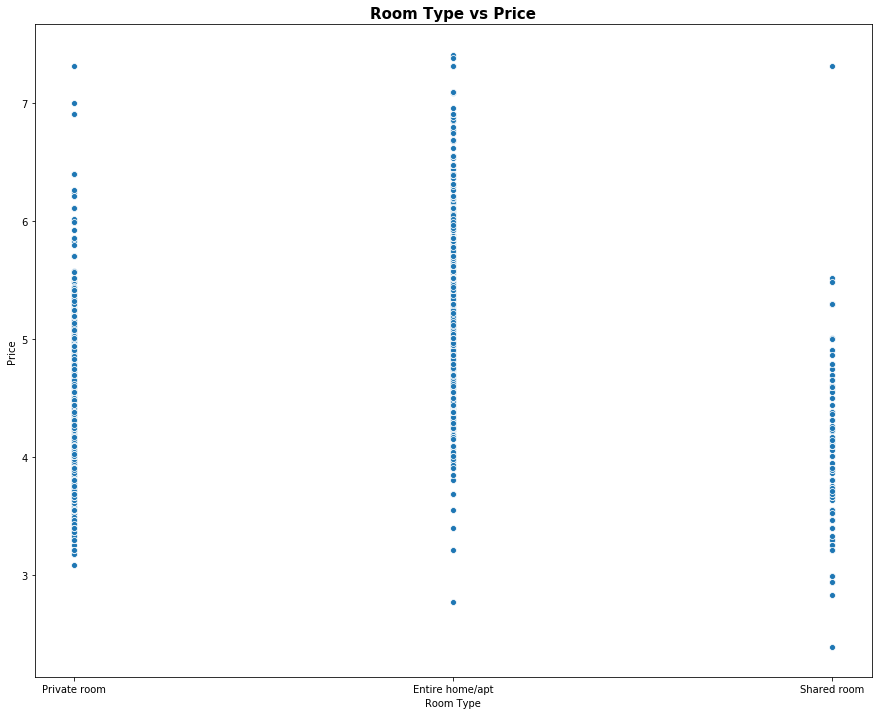

In [10]:

plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='log_price', data=NYC_data)

plt.xlabel("Room Type", size=10)
plt.ylabel("Price", size=10)
plt.title("Room Type vs Price",size=15, weight='bold')

# Creating view of top10_freq_neighbourhoodwith respect price 

In [11]:
top10_freq_neighbourhood=NYC_data.neighbourhood.value_counts().head(10)
print(top10_freq_neighbourhood)

Williamsburg          442
Bedford-Stuyvesant    296
Bushwick              248
Upper West Side       210
Harlem                208
Upper East Side       185
Crown Heights         184
Hell's Kitchen        178
Lower East Side       137
East Harlem           137
Name: neighbourhood, dtype: int64


In [12]:
top10_freq_neighbourhood_data=NYC_data[NYC_data['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
top10_freq_neighbourhood_data

,Unnamed: 0,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
3,21502,1754527,5.010635,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,strict,...,40.800331,-73.965090,BEAUTIFUL 1BR APT ON THE UPPER WEST,Upper West Side,49,96.0,NaN,10025,1.0,2.0
4,13431,16823953,4.317488,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,...,40.711386,-73.963529,1st floor room in the heart of Williamsburg,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/bc456a57-b...,11249,1.0,1.0
6,5389,2636988,4.262680,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Heatin...",2,1.0,Real Bed,flexible,...,40.694177,-73.918841,Entire furnished apartment in Brooklyn,Bushwick,5,92.0,https://a0.muscache.com/im/pictures/ba4b3477-1...,11221,1.0,1.0
7,21857,20965965,4.248495,Apartment,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,strict,...,40.803351,-73.956142,Cozy and Neat Pre-War Apartment,Harlem,0,NaN,https://a0.muscache.com/im/pictures/977a8e0f-a...,10026,1.0,1.0
10,29298,2182851,3.806662,Apartment,Private room,"{""Pets live on this property"",Cat(s),""Smoke de...",2,1.0,Real Bed,flexible,...,40.689874,-73.914330,"Large, cozy, spacious room",Bushwick,0,NaN,https://a0.muscache.com/im/pictures/ef118ee9-1...,11221,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,24714,21023168,4.867534,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",5,1.0,Real Bed,flexible,...,40.682395,-73.935966,Furnished BrownStone Apartment,Bedford-Stuyvesant,49,95.0,https://a0.muscache.com/im/pictures/0dad2ee4-0...,11233,2.0,4.0
4843,8047,11145641,4.276666,Apartment,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,...,40.693702,-73.931041,Charming private room & sunny deck!,Bedford-Stuyvesant,36,90.0,NaN,11221,1.0,1.0
4845,17804,14139651,3.688879,Apartment,Private room,"{""Wireless Internet"",Kitchen,Heating,Essentials}",2,1.0,Real Bed,flexible,...,40.683968,-73.951364,Bright & cozy room in Brooklyn!,Bedford-Stuyvesant,0,NaN,https://a0.muscache.com/im/pictures/92226026/a...,11216,1.0,1.0
4846,5608,12524258,4.094345,Apartment,Private room,"{Internet,""Wireless Internet"",Kitchen,Heating,...",4,1.0,Real Bed,moderate,...,40.681610,-73.907956,Guestroom w/ 2 beds 20 mins to NYC,Bushwick,205,97.0,https://a0.muscache.com/im/pictures/9733510/63...,11207,1.0,2.0


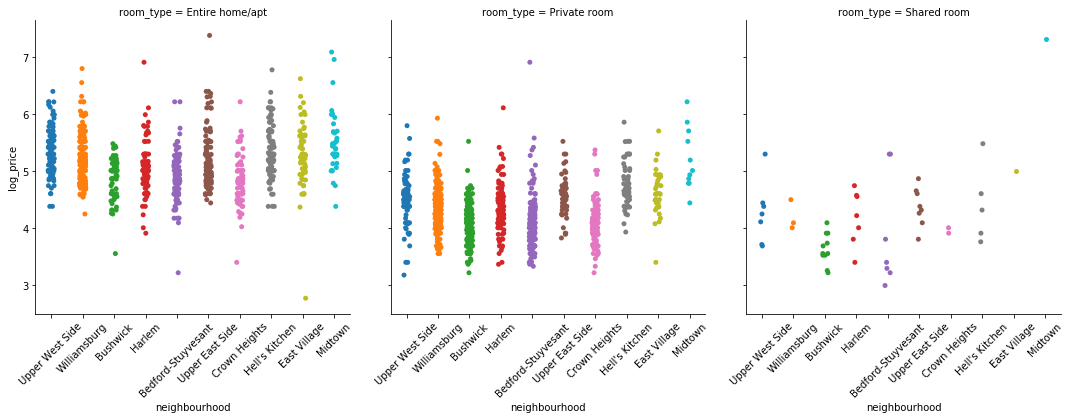

In [13]:
t=sns.catplot(x="neighbourhood", y="log_price", col="room_type", data=top10_freq_neighbourhood_data)
t.set_xticklabels(rotation=45)

### Heatmap

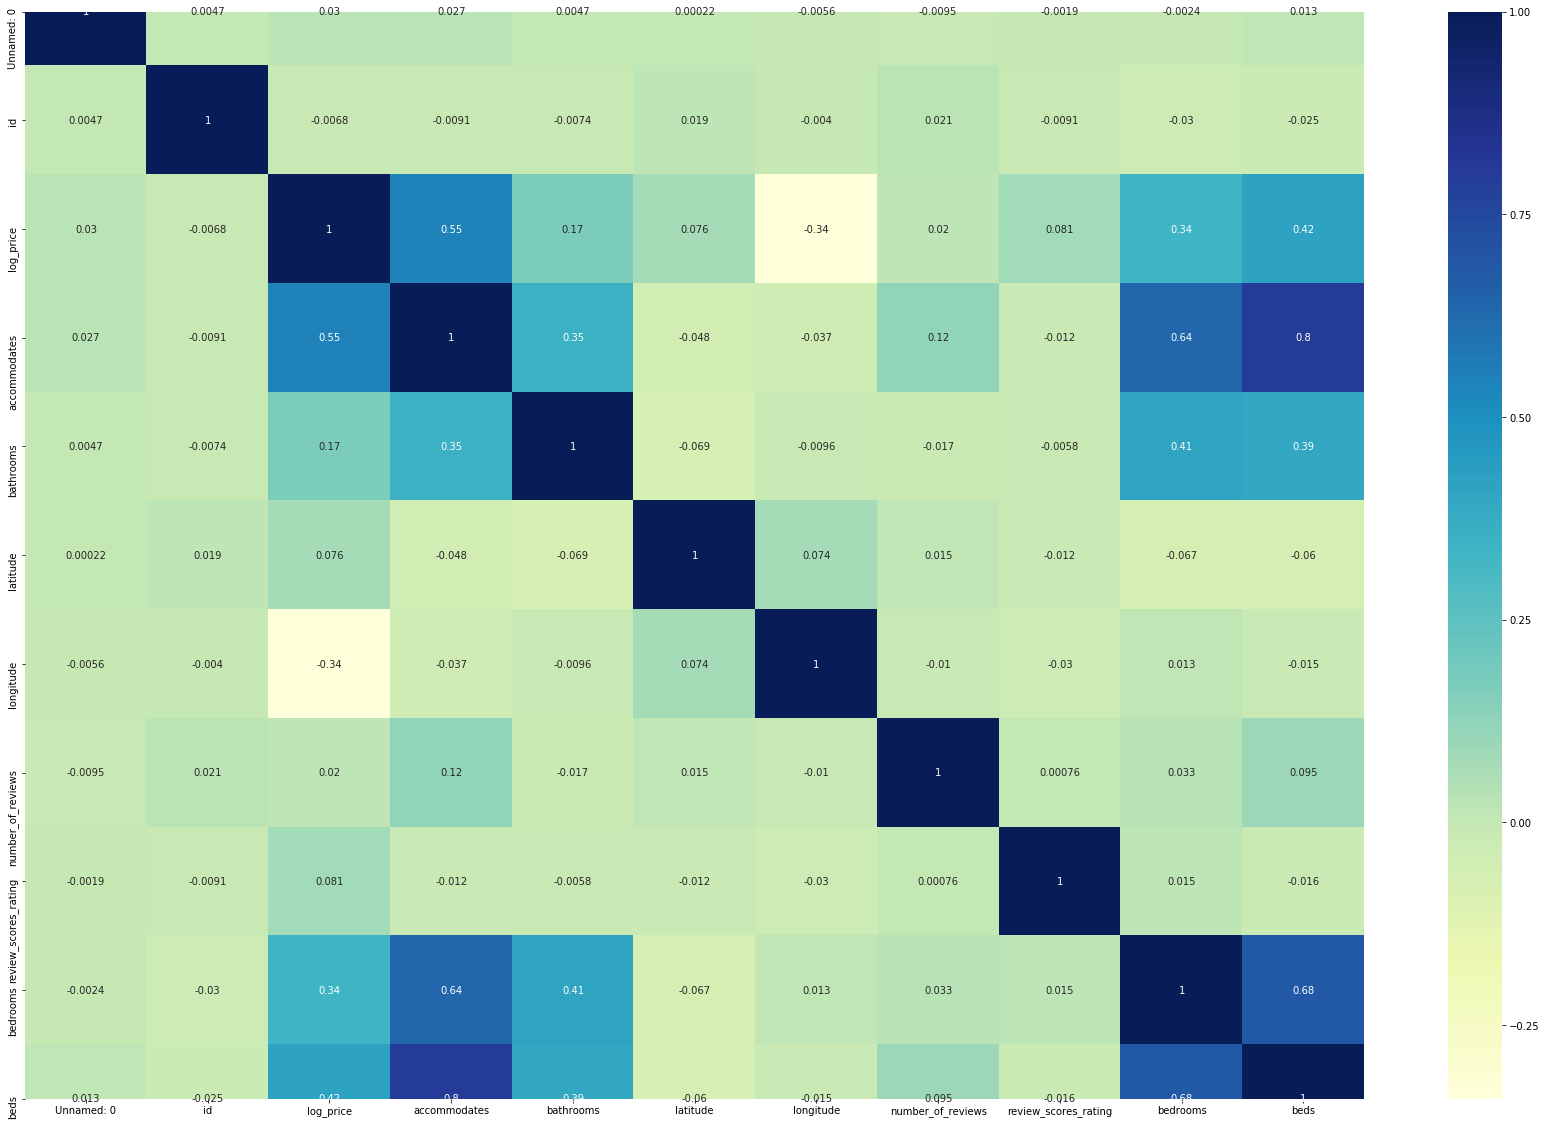

In [14]:
plt.figure(figsize=(20,20)) 
sns.heatmap(NYC_data.corr(), annot=True, cmap="YlGnBu")

### Histogram of various features present in the dataframe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F11ED2D448>,
      dtype=object)

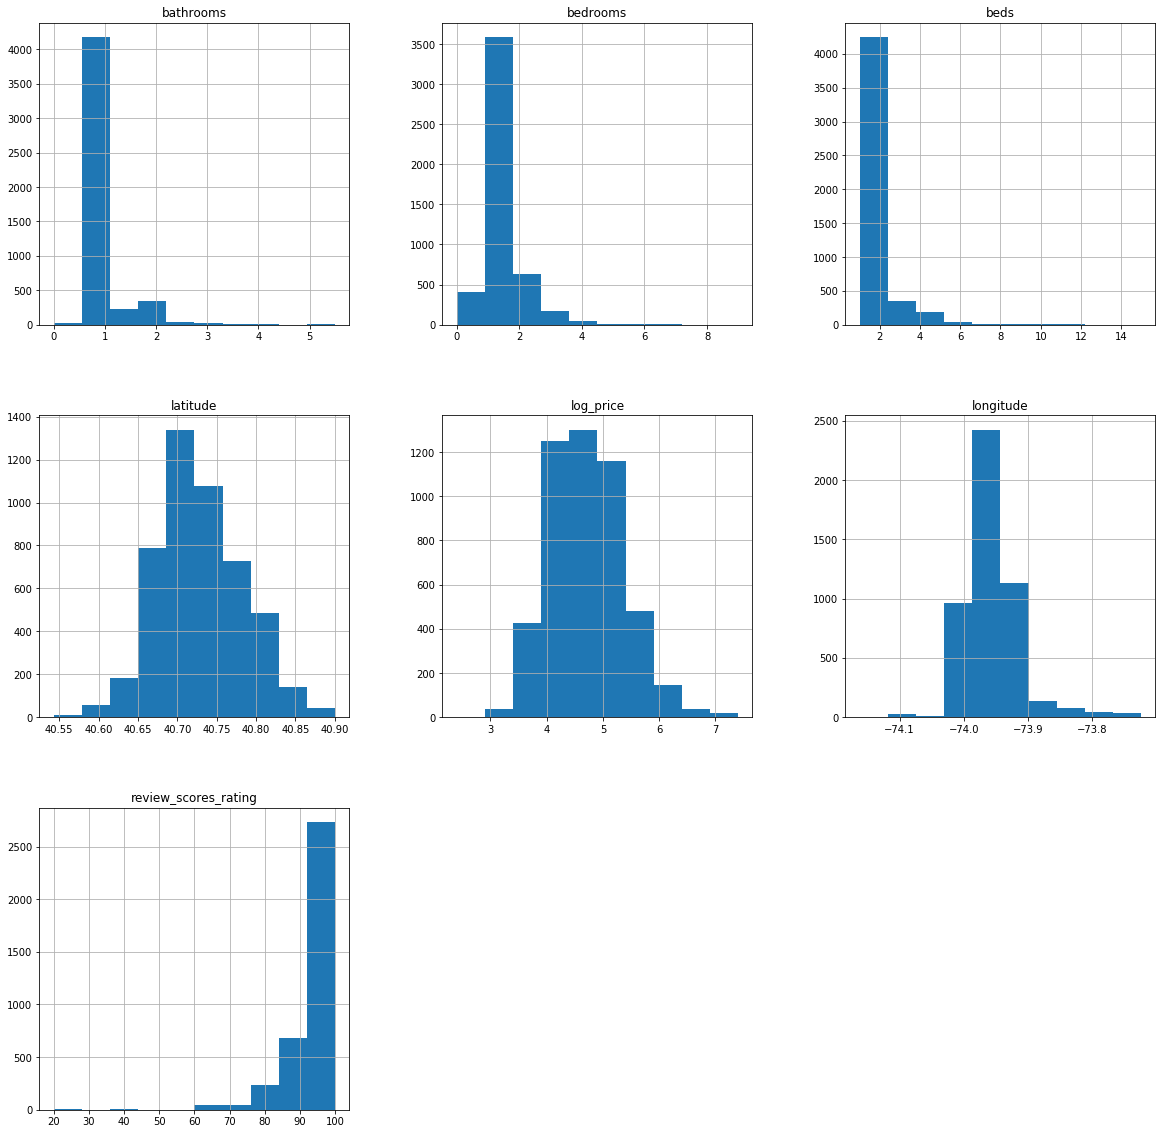

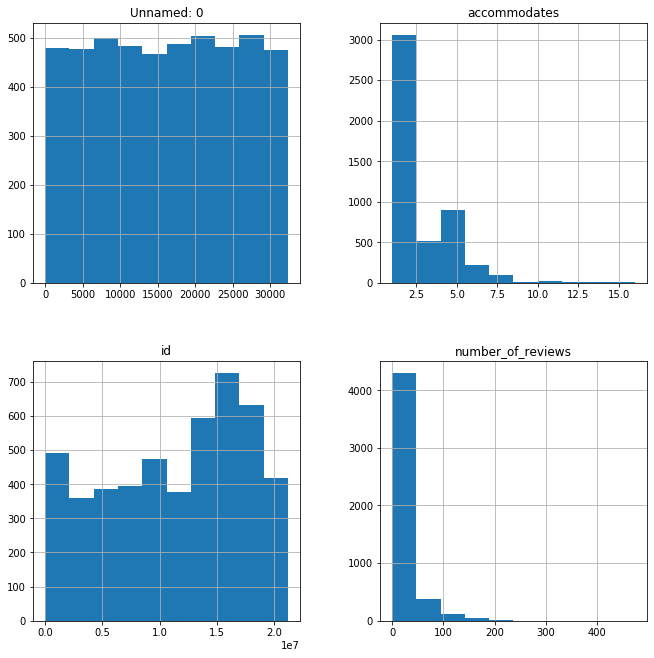

In [15]:
NYC_data[NYC_data.dtypes[(NYC_data.dtypes=="float")].index.values].hist(figsize=[20,20])
NYC_data[NYC_data.dtypes[(NYC_data.dtypes=="int64")].index.values].hist(figsize=[11,11])

In [16]:
NYC_data.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4852.0,1.623937e+04,9.325224e+03,4.000000,8.123500e+03,1.633650e+04,2.442150e+04,3.234800e+04
id,4852.0,1.133776e+07,6.080574e+06,3152.000000,6.213140e+06,1.236683e+07,1.649103e+07,2.117444e+07
log_price,4852.0,4.708381e+00,6.594890e-01,2.397895,4.248495e+00,4.649176e+00,5.164786e+00,7.408531e+00
accommodates,4852.0,2.778648e+00,1.800746e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,4838.0,1.122261e+00,3.699294e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,5.500000e+00
latitude,4852.0,4.072880e+01,5.336419e-02,40.542680,4.069014e+01,4.072289e+01,4.076384e+01,4.090080e+01
longitude,4852.0,-7.395477e+01,4.202628e-02,-74.162537,-7.398367e+01,-7.395690e+01,-7.393956e+01,-7.372349e+01
number_of_reviews,4852.0,1.793157e+01,3.270683e+01,0.000000,1.000000e+00,5.000000e+00,2.000000e+01,4.740000e+02
review_scores_rating,3759.0,9.349322e+01,8.581227e+00,20.000000,9.100000e+01,9.600000e+01,1.000000e+02,1.000000e+02
bedrooms,4850.0,1.157938e+00,6.998541e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00


### Mapping Showing neighbourhood distribution where Airbnb Room available as per hour Dataset

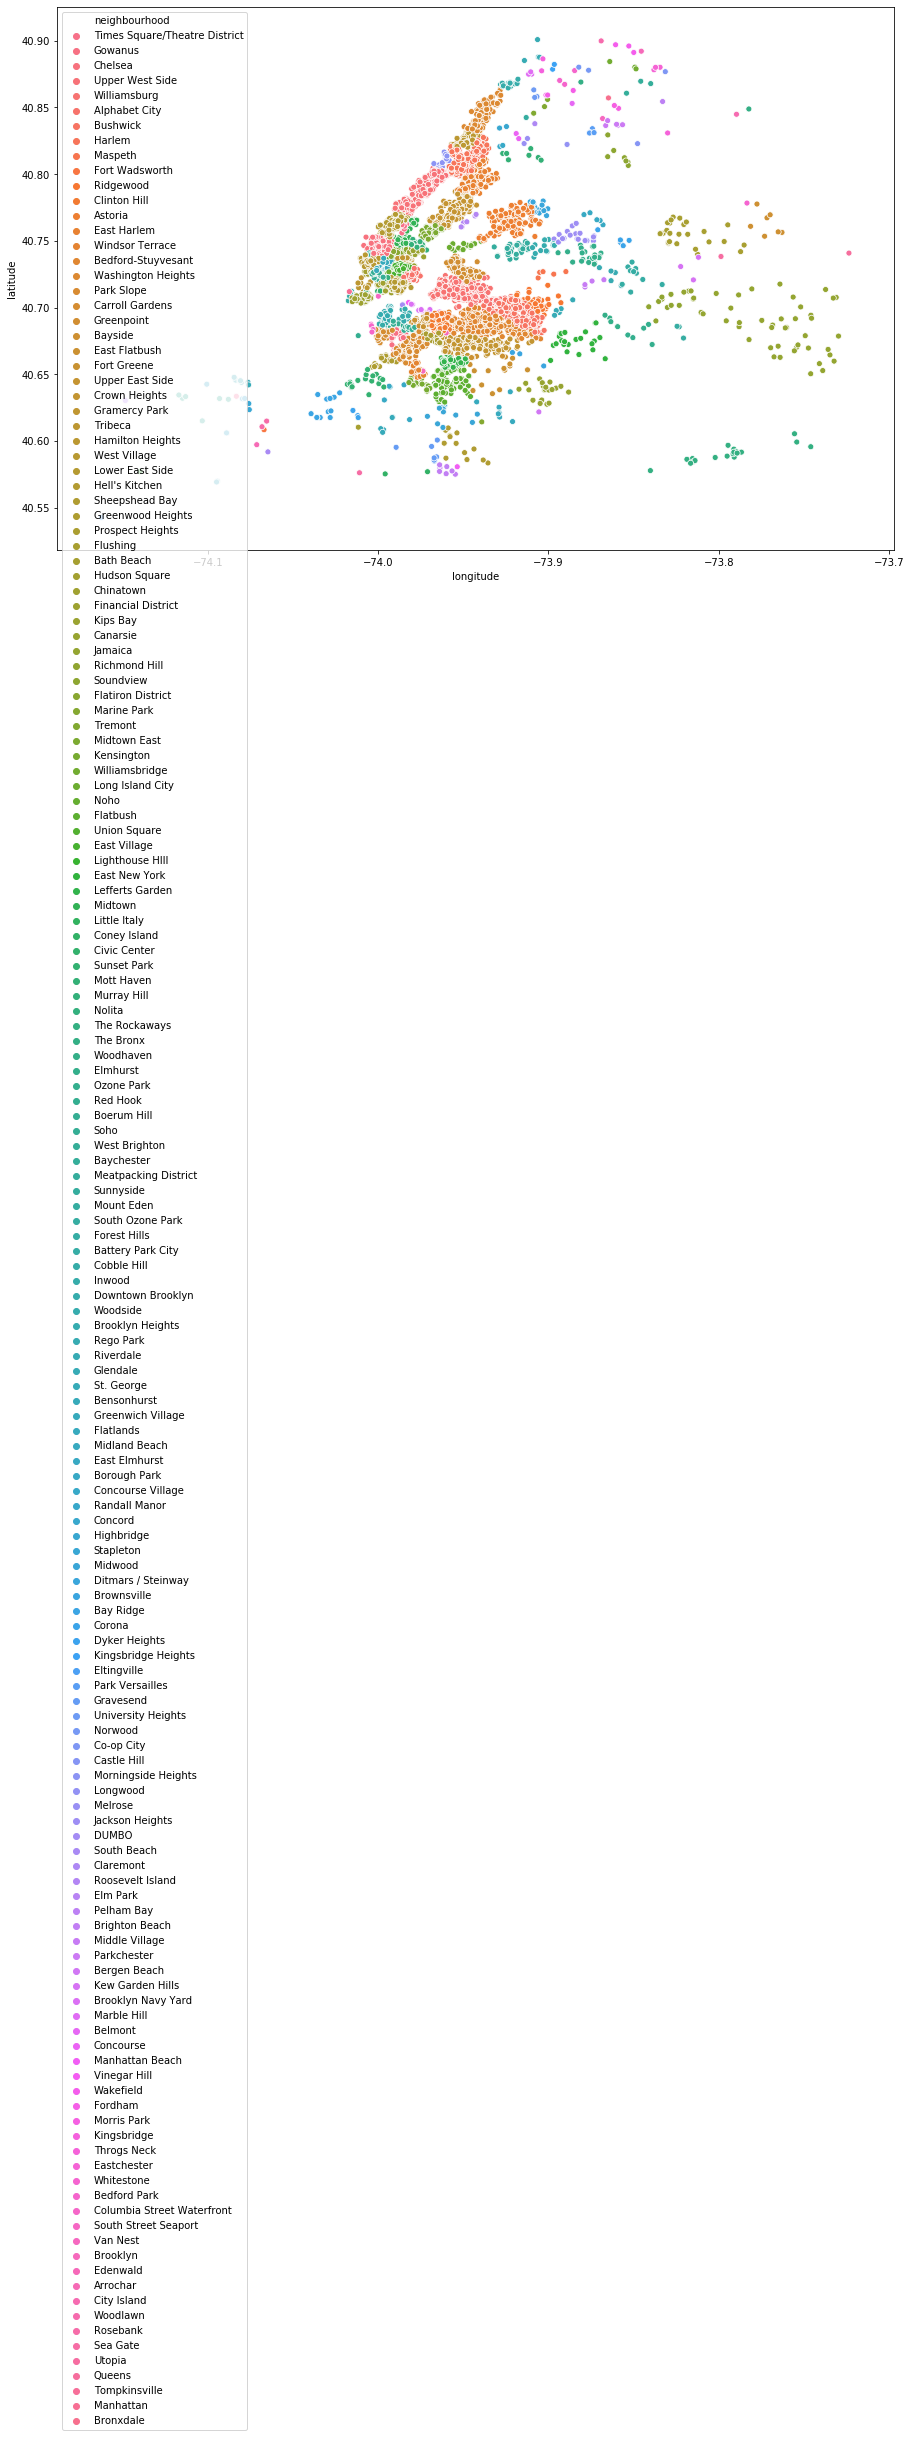

In [17]:
plt.figure(figsize=(15,10))
sns.scatterplot(NYC_data.longitude,NYC_data.latitude,hue=NYC_data.neighbourhood)
plt.ioff()

In [18]:
#imputing values with mean, median and mode
#mode is 1.0
NYC_data['bathrooms'].fillna(NYC_data['bathrooms'].mode()[0],inplace=True)
#mean is 93.50
NYC_data['review_scores_rating'].fillna(NYC_data['review_scores_rating'].mean(),inplace=True)
#mode is 1 bedroom
NYC_data['bedrooms'].fillna(NYC_data['bedrooms'].mode()[0],inplace=True)
#mode is 1 bed
NYC_data['beds'].fillna(NYC_data['beds'].mode()[0],inplace=True)

In [19]:
#Checking the number of null count
NYC_data.isnull().sum()

Unnamed: 0                   0
id                           0
log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                    0
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review              1019
host_has_profile_pic        38
host_identity_verified      38
host_response_rate        1504
host_since                  38
instant_bookable             0
last_review               1015
latitude                     0
longitude                    0
name                         0
neighbourhood                0
number_of_reviews            0
review_scores_rating         0
thumbnail_url              358
zipcode                     63
bedrooms                     0
beds                         0
dtype: int64

In [20]:
#Removing the null values from is_null
Remove_null=pd.DataFrame({"val":NYC_data['zipcode'].isnull()})
NYC_data=NYC_data[Remove_null['val']==False]

# Dropping those feature which are not required for our analysis

In [21]:
NYC_data=NYC_data.drop(['Unnamed: 0','amenities','bed_type','city','description','first_review',
                        'host_has_profile_pic','host_identity_verified','host_response_rate','host_since'
                       ,'last_review','name','neighbourhood','thumbnail_url','zipcode','id'],axis=1)

In [22]:
NYC_data.isnull().sum()

log_price               0
property_type           0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
latitude                0
longitude               0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
dtype: int64

In [23]:
NYC_data.describe()

,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000
mean,4.705982,2.767592,1.121529,40.728855,-73.954704,17.957194,93.483237,1.156609,1.530591
std,0.658785,1.785157,0.369942,0.053468,0.042065,32.749212,7.547036,0.697373,1.000498
min,2.397895,1.000000,0.000000,40.542680,-74.162537,0.000000,20.000000,0.000000,1.000000
25%,4.248495,2.000000,1.000000,40.690093,-73.983666,1.000000,93.000000,1.000000,1.000000
50%,4.624973,2.000000,1.000000,40.722996,-73.956807,5.000000,93.493216,1.000000,1.000000
75%,5.164786,4.000000,1.000000,40.763896,-73.939605,20.000000,98.000000,1.000000,2.000000
max,7.408531,16.000000,5.500000,40.900803,-73.723488,474.000000,100.000000,9.000000,15.000000


In [24]:
NYC_data.describe(include = 'O')

,property_type,room_type,cancellation_policy,cleaning_fee,instant_bookable
count,4789,4789,4789,4789,4789
unique,7,3,3,2,2
top,Apartment,Entire home/apt,strict,Cleaning Fee Req,No Instant Booking
freq,4044,2360,2152,3393,3618


In [25]:
#categorical=['property_type','room_type','cancellation_policy','instant_bookable']
NYC_data=pd.concat((NYC_data,pd.get_dummies(NYC_data['property_type'])),axis=1)
NYC_data=pd.concat((NYC_data,pd.get_dummies(NYC_data['room_type'])),axis=1)
NYC_data=pd.concat((NYC_data,pd.get_dummies(NYC_data['cancellation_policy'])),axis=1)
NYC_data=pd.concat((NYC_data,pd.get_dummies(NYC_data['instant_bookable'])),axis=1)
NYC_data=pd.concat((NYC_data,pd.get_dummies(NYC_data['cleaning_fee'])),axis=1)

In [26]:
NYC_data=NYC_data.drop(['property_type','room_type','cancellation_policy','instant_bookable','cleaning_fee'],axis=1)

In [27]:
NYC_data.isnull().sum()

log_price               0
accommodates            0
bathrooms               0
latitude                0
longitude               0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
Apartment               0
Condo                   0
Hotel type 1            0
Hotel type 2            0
House                   0
Housing                 0
Other                   0
Entire home/apt         0
Private room            0
Shared room             0
flexible                0
moderate                0
strict                  0
Instant Booking         0
No Instant Booking      0
Cleaning Fee Req        0
No Cleaning Fee         0
dtype: int64

# Splitting the data

In [28]:
target = NYC_data['log_price']
target_df = pd.DataFrame(target)
target_df.head()

,log_price
0,4.382027
1,5.075174
3,5.010635
4,4.317488
5,5.416100


In [29]:
features_df=NYC_data.drop(['log_price'],axis=1)
features_df.head()

,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,Apartment,Condo,...,Entire home/apt,Private room,Shared room,flexible,moderate,strict,Instant Booking,No Instant Booking,Cleaning Fee Req,No Cleaning Fee
0,1,1.0,40.762239,-73.981589,1,93.493216,1.0,1.0,0,1,...,0,1,0,1,0,0,0,1,0,1
1,3,1.0,40.677892,-73.992054,17,98.000000,1.0,2.0,1,0,...,1,0,0,0,0,1,0,1,1,0
3,4,1.0,40.800331,-73.965090,49,96.000000,1.0,2.0,1,0,...,1,0,0,0,0,1,0,1,1,0
4,2,1.0,40.711386,-73.963529,0,93.493216,1.0,1.0,1,0,...,0,1,0,1,0,0,1,0,0,1
5,5,1.0,40.726874,-73.979947,0,93.493216,2.0,2.0,1,0,...,1,0,0,1,0,0,0,1,1,0


In [30]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(features_df,target_df, test_size=0.25, random_state = 0)

## Scaling the Data

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [32]:
X_train = pd.DataFrame(X_train, columns = X_train_org.columns)
print('Train dataset dimensionality:' , X_train.shape)
print('Train dataset dimensionality:' , y_train.shape)

Train dataset dimensionality: (3591, 25)
Train dataset dimensionality: (3591, 1)


In [33]:
X_test = pd.DataFrame(X_test, columns = X_test_org.columns)
print('Test dataset dimensionality:' , X_test.shape)
print('Train dataset dimensionality:' , y_test.shape)

Test dataset dimensionality: (1198, 25)
Train dataset dimensionality: (1198, 1)


# Model 1 Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regressor = LinearRegression()

regressor.fit(X_train, y_train)
print('Train Score for Linear Regression model : {:.3f}'.format(regressor.score(X_train, y_train)))
print('Test Score for Linear Regression model : {:.3f}\n'.format(regressor.score(X_test, y_test)))

pred_linear = regressor.predict(X_test)

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_linear))))
print('r2_score: {:.4f}'.format(r2_score(y_test,pred_linear)))

Train Score for Linear Regression model : 0.593
Test Score for Linear Regression model : 0.558

RMSE: 0.4370
r2_score: 0.5575


### Cross Validation

In [35]:
scores_linear = cross_val_score(regressor, X_train,y_train,cv=5)
print("Cross-validation scores: {}".format(scores_linear))
print("Average cross-validation training score: {:.2f}".format(scores_linear.mean()))

Cross-validation scores: [0.61194795 0.5845438  0.55653722 0.63813353 0.53083676]
Average cross-validation training score: 0.58


In [36]:
scores = cross_val_score(regressor, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation  test score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.48379913 0.5354153  0.57135199 0.55241958 0.60381529]
Average cross-validation  test score: 0.55


### Apply GridSearch on Linear

In [37]:
from pprint import pprint
pprint(regressor.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [38]:
param_grid_linear = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

CrossValidation_linearreg = GridSearchCV(regressor,param_grid_linear ,cv=5, return_train_score=True, verbose = 1, n_jobs = -1)
CrossValidation_linearreg.fit(X_train, y_train)

best_parameters_lreg=CrossValidation_linearreg.best_params_
print(best_parameters_lreg)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'copy_X': True, 'fit_intercept': False, 'normalize': True}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.7s finished


In [39]:
regressor =LinearRegression(copy_X = True,fit_intercept = True, normalize= True)

regressor.fit(X_train, y_train)

y_pred_linear=regressor.predict(X_test)

print('Train score: {:.4f} %'.format(regressor.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(regressor.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_linear))))
print('r2_score: {:.4f}'.format(r2_score(y_test,y_pred_linear)))

Train score: 59.3374 %
Test score: 55.8059 %
RMSE: 0.4367
r2_score: 0.5581


# Model 2 Polynomial Regression

In [40]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_reg_poly = poly.fit_transform(X_train)
    X_test_reg_poly = poly.transform(X_test)
    regressor_poly =LinearRegression()
    regressor_poly.fit(X_train_reg_poly, y_train)
    train_score_list.append(regressor_poly.score(X_train_reg_poly, y_train))
    test_score_list.append(regressor_poly.score(X_test_reg_poly, y_test))
    
print(train_score_list)
print(test_score_list)

[0.5934564826310778, 0.6909087587915956]
[0.5573963303824387, -5.106767712374924e+17]


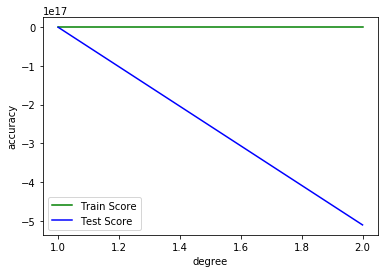

In [41]:
x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [42]:
poly = PolynomialFeatures(1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
regressor_poly.fit(X_train_poly, y_train)

y_poly=regressor_poly.predict(X_test_poly)

print('Train score: {:.4f} %'.format(regressor_poly.score(X_train_poly, y_train)*100))
print('Test score: {:.4f} %'.format(regressor_poly.score(X_test_poly, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_poly))))
print('R2 score: {:.4f}'.format(r2_score(y_test,y_poly)))

Train score: 59.3456 %
Test score: 55.7396 %
RMSE: 0.4370
R2 score: 0.5574


### Cross validation

In [43]:
scores = cross_val_score(regressor_poly, X_train,y_train,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation  training score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.61194795 0.5845438  0.55653722 0.63813353 0.53083676]
Average cross-validation  training score: 0.58


In [44]:
scores = cross_val_score(regressor_poly, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation  test score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.48379913 0.5354153  0.57135199 0.55241958 0.60381529]
Average cross-validation  test score: 0.55


### Grid Search on Polynomial

In [45]:
from pprint import pprint
pprint(poly.get_params())

{'degree': 1, 'include_bias': True, 'interaction_only': False, 'order': 'C'}


In [46]:
#degrees = np.arange(1, 25)
param_grid_poly = { 'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False] }
CrossValidation_poly = GridSearchCV(regressor_poly,cv=5 ,param_grid=param_grid_poly, verbose=1, n_jobs=-1, scoring= None)
CrossValidation_poly.fit(X_train, y_train)

best_parameters_poly=CrossValidation_poly.best_params_
print(best_parameters_poly)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'copy_X': True, 'fit_intercept': False, 'normalize': True}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


In [47]:
poly = PolynomialFeatures(1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
regressor_poly=LinearRegression(copy_X= True,fit_intercept=True,normalize =True)
regressor_poly.fit(X_train_poly, y_train)

y_pred_poly=regressor_poly.predict(X_test_poly)

print('Train score: {:.4f} %'.format(regressor_poly.score(X_train_poly, y_train)*100))
print('Test score: {:.4f} %'.format(regressor_poly.score(X_test_poly, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_poly))))
print('R2 score: {:.4f}'.format(r2_score(y_test,y_pred_poly)))

Train score: 59.3536 %
Test score: 55.7737 %
RMSE: 0.4369
R2 score: 0.5577


# Model 3 KNN Regressor

In [48]:
from sklearn.neighbors import KNeighborsRegressor
sns.set(rc={'figure.figsize':(15,12)})

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test)) 
    

Text(0, 0.5, 'MSE')

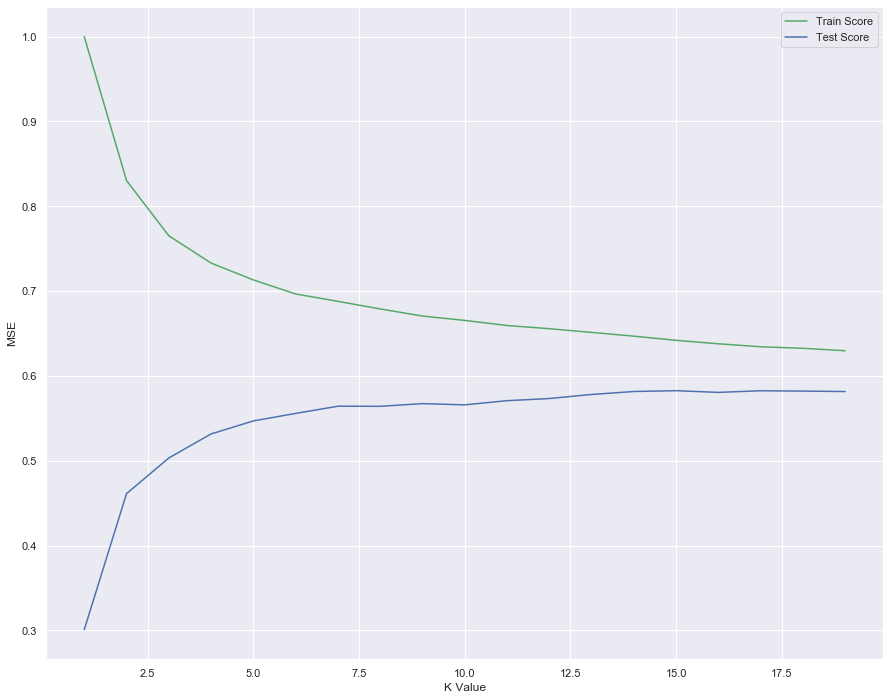

In [49]:
x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('K Value')
plt.ylabel('MSE')

In [50]:
knn = KNeighborsRegressor(13)
knn.fit(X_train, y_train)

print("KNN train score: {:.4f} %".format(knn.score(X_train, y_train)*100))
print("KNN test score: {:.4f} %".format(knn.score(X_test, y_test)*100))

KNN train score: 65.1356 %
KNN test score: 57.8198 %


### Cross Validation

In [51]:
scores_knn = cross_val_score(knn, X_train,y_train,cv=5,n_jobs=-1)
print("Cross-validation scores: {}".format(scores_knn))
print("Average cross-validation score: {:.2f}".format(scores_knn.mean()))

Cross-validation scores: [0.60047531 0.60528772 0.53131558 0.60404943 0.55790808]
Average cross-validation score: 0.58


In [52]:
scores_knn = cross_val_score(knn, X_test,y_test,cv=5,n_jobs=-1)
print("Cross-validation scores: {}".format(scores_knn))
print("Average cross-validation score: {:.2f}".format(scores_knn.mean()))

Cross-validation scores: [0.51479579 0.52129495 0.51543584 0.54656202 0.54752316]
Average cross-validation score: 0.53


### Applying grid on KNN

In [53]:
from pprint import pprint
pprint(knn.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'uniform'}


In [54]:
param_grid_knn = {
            'n_neighbors' : [*range(1,20,2)],
            'p': [1,2],
            'weights': ['distance','uniform'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }

CrossValidation_knn = GridSearchCV(estimator =knn, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1)
CrossValidation_knn.fit(X_train, y_train)

best_parameters_knn=CrossValidation_knn.best_params_
print(best_parameters_knn)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   33.4s


{'algorithm': 'auto', 'n_neighbors': 13, 'p': 1, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   38.9s finished


In [55]:
knn =KNeighborsRegressor(n_neighbors=13,weights='distance',algorithm='auto',p=1)

knn.fit(X_train, y_train)

y_pred_knn=knn.predict(X_test)

print('Train score: {:.4f} %'.format(knn.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(knn.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_knn))))
print('r2_score: {:.4f}'.format(r2_score(y_test,y_pred_knn)))

Train score: 100.0000 %
Test score: 57.8336 %
RMSE: 0.4266
r2_score: 0.5783


# Model 4 Ridge Regressor

In [56]:
from  sklearn.linear_model import Ridge
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, 'Hyperparameter:alpha')

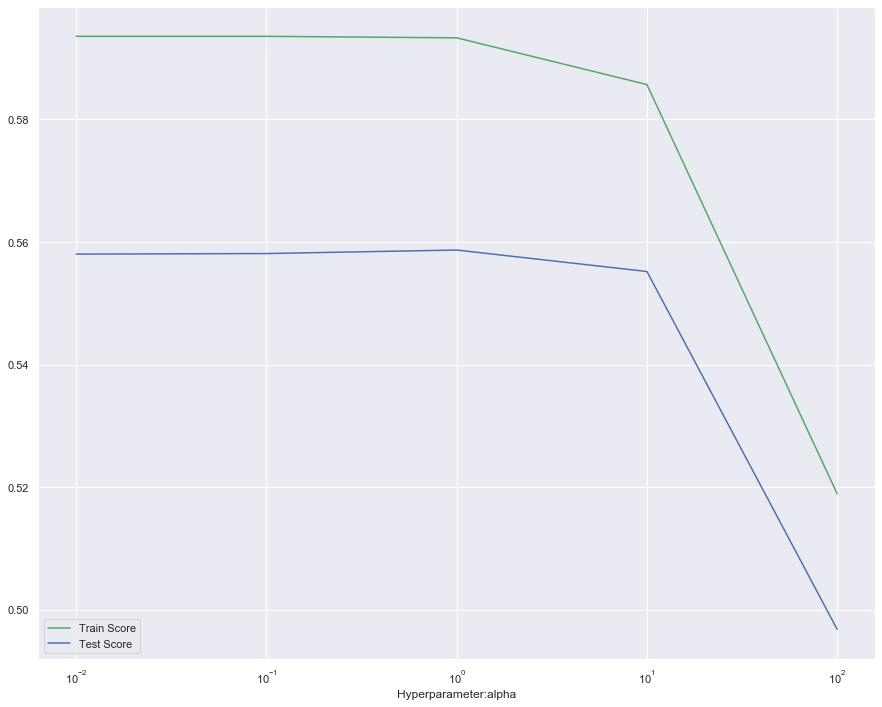

In [57]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,12)})

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('Hyperparameter:alpha')

In [58]:
#It seems like alpha = 10 is the best paramter for Ridge model

In [59]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
print('Train score on best parameters for Ridge regressor {:.3f}'.format(ridge.score(X_train,y_train)))
print('Test score on best parameters for Ridge regressor {:.3f}'.format(ridge.score(X_test,y_test)))

Train score on best parameters for Ridge regressor 0.586
Test score on best parameters for Ridge regressor 0.555


### Cross Validation

In [60]:
scores_ridge = cross_val_score(ridge, X_train,y_train,cv=5)
print("Cross-validation scores: {}".format(scores_ridge))
print("Average cross-validation training score: {:.2f}".format(scores_ridge.mean()))

Cross-validation scores: [0.59861954 0.58404166 0.54325297 0.61873494 0.53535931]
Average cross-validation training score: 0.58


In [61]:
scores_ridge = cross_val_score(ridge, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores_ridge))
print("Average cross-validation test score: {:.2f}".format(scores_ridge.mean()))

Cross-validation scores: [0.48819652 0.50246381 0.52388928 0.54154802 0.56867757]
Average cross-validation test score: 0.52


### Applying gridSearch

In [62]:
from pprint import pprint
pprint(ridge.get_params())

{'alpha': 10,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}


In [63]:
param_grid_ridge = { 'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'fit_intercept': [True,False],'normalize': [True,False]}
            
CrossValidation_ridge = GridSearchCV(estimator =ridge, param_grid = param_grid_ridge , return_train_score=True, verbose = 1, n_jobs = -1)
CrossValidation_ridge.fit(X_train, y_train)

best_parameters_ridge=CrossValidation_ridge.best_params_
print(best_parameters_ridge)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'alpha': 0.01, 'fit_intercept': True, 'normalize': True}


[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    0.3s finished


In [64]:
ridge = Ridge(alpha = 0.01,fit_intercept= True, normalize= True)
ridge.fit(X_train,y_train)

y_pred_ridge=ridge.predict(X_test)

print('Train score: {:.4f} %'.format(ridge.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(ridge.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_ridge))))
print('r2_score: {:.4f}'.format(r2_score(y_test,y_pred_ridge)))

Train score: 59.3526 %
Test score: 55.8572 %
RMSE: 0.4364
r2_score: 0.5586


# Model 5  Lasso Regressor

In [65]:
from  sklearn.linear_model import Lasso
x_range = [0.001,0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

In [66]:
print(train_score_list)
print(test_score_list)

[0.5894568772576743, 0.51476845224113, 0.33509663170147763, 0.0, 0.0, 0.0]
[0.556735706740979, 0.49214971544010444, 0.32405187500526866, -0.007926470293011079, -0.007926470293011079, -0.007926470293011079]


Text(0.5, 0, '$\\alpha$')

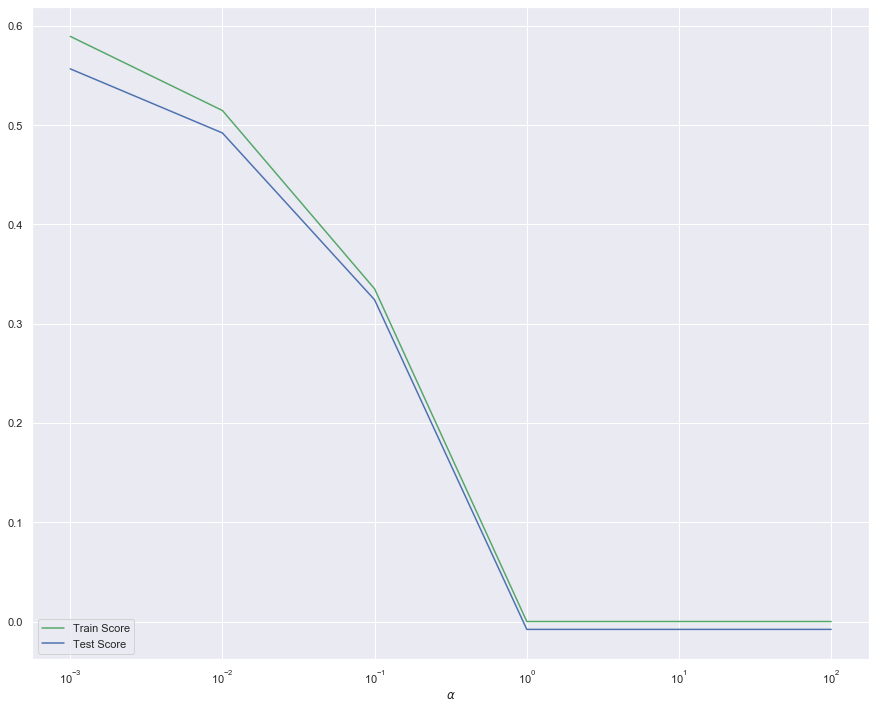

In [67]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [68]:
#alpha=1 is the best hyper parameter for Lasso

In [69]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
print('Train score on best parameters for Lasso regressor {:.3f}'.format(lasso.score(X_train,y_train)))
print('Test score on best parameters for Lasso regressor {:.3f}'.format(lasso.score(X_test,y_test)))

Train score on best parameters for Lasso regressor 0.000
Test score on best parameters for Lasso regressor -0.008


### Cross Validation

In [70]:
scores_lasso = cross_val_score(lasso, X_train,y_train,cv=5)
print("Cross-validation scores: {}".format(scores_lasso))
print("Average cross-validation training score: {:.2f}".format(scores_lasso.mean()))

Cross-validation scores: [-1.81393791e-04 -3.14820700e-03 -1.43724299e-03 -2.73462216e-05
 -8.59728552e-05]
Average cross-validation training score: -0.00


In [71]:
scores_lasso = cross_val_score(lasso, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores_lasso))
print("Average cross-validation test score: {:.2f}".format(scores_lasso.mean()))

Cross-validation scores: [-2.63566378e-05 -2.91881371e-03 -8.00693490e-03 -1.12919375e-03
 -3.14436402e-02]
Average cross-validation test score: -0.01


### Applying Grid

In [72]:
from pprint import pprint
pprint(lasso.get_params())

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}


In [73]:
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'fit_intercept': [True,False], 'normalize': [True,False]}
            
CrossValidation_lasso = GridSearchCV(estimator =lasso, param_grid = param_grid_ridge , return_train_score=True, verbose = 1, n_jobs = -1)
CrossValidation_lasso.fit(X_train, y_train)

best_parameters_lasso=CrossValidation_lasso.best_params_
print(best_parameters_lasso)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'alpha': 0.001, 'fit_intercept': True, 'normalize': False}


[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    0.4s finished


In [74]:
lasso = Lasso(alpha = 0.001,fit_intercept = True, normalize = False)
lasso.fit(X_train,y_train)

y_pred_lasso=lasso.predict(X_test)

print('Train score: {:.4f} %'.format(lasso.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(lasso.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_lasso))))
print('r2_score: {:.4f}'.format(r2_score(y_test,y_pred_lasso)))

Train score: 58.9457 %
Test score: 55.6736 %
RMSE: 0.4373
r2_score: 0.5567


# Model 6 Support Vector Machine Regressor

In [75]:
sns.set(rc={'figure.figsize':(15,12)})
linear_svm = LinearSVR()

linear_svm.fit(X_train, y_train)
y_pred=linear_svm.predict(X_test)

trainscore_array = []
testscore_array = []

for n in range(1,10):
    linear_svm = LinearSVR(max_iter=n)
    linear_svm.fit(X_train, y_train)
    trainscore_array.append(linear_svm.score(X_train, y_train))
    testscore_array.append(linear_svm.score(X_test, y_test))
print(trainscore_array)
print(testscore_array)

[0.5264099862282314, 0.4050808998733121, 0.11694171104598794, 0.3834038857747447, 0.4554346697495001, 0.5261729463200706, 0.18627556208210183, 0.49586074855854045, 0.5198905037968666]
[0.4982145766026695, 0.34890418496081077, -0.019850028893667604, 0.29716804265545327, 0.4021060250056787, 0.4893873134110661, 0.11160172520672085, 0.4357933246897454, 0.4641466677425321]


Text(0, 0.5, 'Score')

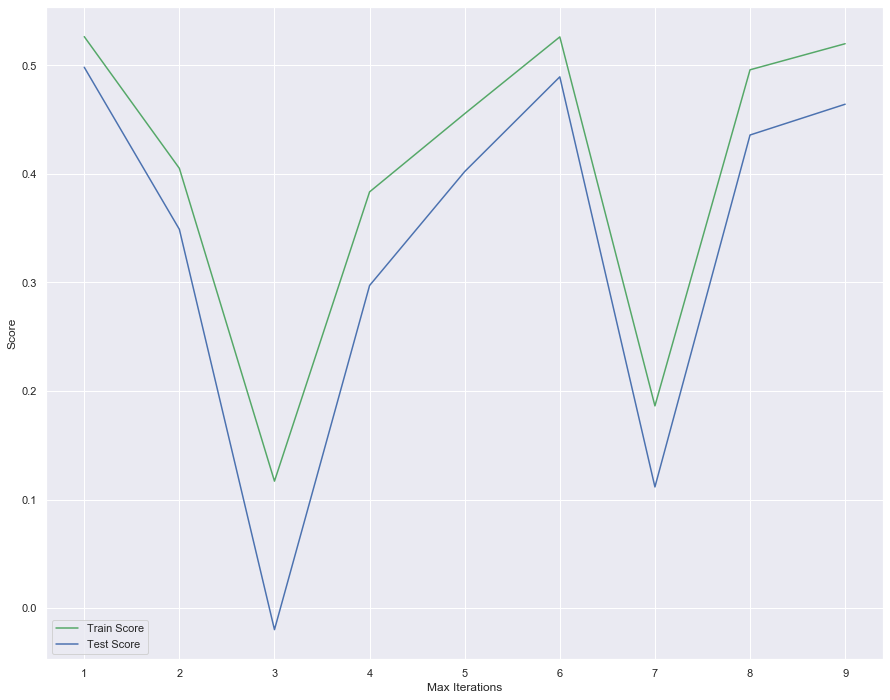

In [76]:
x_axis = range(1,10)
plt.plot(x_axis, trainscore_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, testscore_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Iterations')
plt.ylabel('Score')

In [77]:
#It seems max_iter =7 is the best hyperparameter for Linear Support Vector Machineb

In [78]:
linear_svm = LinearSVR(max_iter=7)
linear_svm.fit(X_train, y_train)

y_pred_svm=linear_svm.predict(X_test)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))
print('r2_score: {:.4f}'.format(r2_score(y_test,y_pred_svm)))

Train score: 3.7603 %
Test score: 3.2548 %
RMSE: 0.6461
r2_score: 0.0325


### Using cross validation for Linear SVM to find average training and test scores

In [79]:
scores_SVM = cross_val_score(linear_svm, X_train,y_train,cv=5)
print("Cross-validation scores: {}".format(scores_SVM))
print("Average cross-validation training score: {:.2f}".format(scores_SVM.mean()))

Cross-validation scores: [0.46055164 0.41845043 0.49863631 0.50533001 0.30893349]
Average cross-validation training score: 0.44


In [80]:
scores_SVM = cross_val_score(linear_svm, X_train,y_train,cv=5)
print("Cross-validation scores: {}".format(scores_SVM))
print("Average cross-validation training score: {:.2f}".format(scores_SVM.mean()))

Cross-validation scores: [ 0.54479378  0.25259393  0.20542528 -0.18116284  0.12088295]
Average cross-validation training score: 0.19


### Applying Grid Search to Linear SVM

In [81]:
from pprint import pprint
pprint(linear_svm.get_params())

{'C': 1.0,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 7,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}


In [82]:
param_grid_linearsvm = {
            'max_iter' : range(1,10),
            }

CV_linearsvm = GridSearchCV(estimator =linear_svm, param_grid = param_grid_linearsvm , return_train_score=True, verbose = 1, n_jobs = -1)
CV_linearsvm.fit(X_train, y_train)

best_parameters_linearsvm=CV_linearsvm.best_params_
print(best_parameters_linearsvm)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.0s remaining:    0.1s


{'max_iter': 4}


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


In [83]:
linear_svm = LinearSVR(max_iter=7)
linear_svm.fit(X_train, y_train)

y_pred_svm=linear_svm.predict(X_test)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))
print('r2_score: {:.4f}'.format(r2_score(y_test,y_pred_svm)))

Train score: 24.5689 %
Test score: 29.1518 %
RMSE: 0.5529
r2_score: 0.2915


### Kernel SVR

### Linear

In [84]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [85]:
grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [86]:
print("Best parameters for kernel linear: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))

Best parameters for kernel linear: {'C': 1, 'gamma': 0.001}
Best score: 0.58


### SVR with kernel 'rbf'

In [87]:
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [88]:
print("Best parameters for kernel rbf: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters for kernel rbf: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.62


### Applying Cross validation on kernelized SVR

In [89]:
best_score=0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for kernel in ['linear','rbf']:
         svr = SVR(gamma=gamma, C=C,kernel=kernel)
         svr.fit(X_train, y_train)
         # perform cross-validation
         scores = cross_val_score(svr, X_train, y_train, cv=5)
         # compute mean cross-validation accuracy
         score = np.mean(scores)
         # if we got a better score, store the score and parameters
         if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma,'kernel':kernel}

In [90]:
print("best score: {:.2f}".format(best_score)) 

best score: 0.62


### Applying Grid Search to Kernelized SVR

In [91]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel':['linear','rbf']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}


In [92]:
grid_search = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)

In [93]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [94]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.62


In [95]:
kernelized_svr = SVR(C=100,gamma=1,kernel ='rbf')
kernelized_svr.fit(X_train, y_train)

y_pred_kernelizedsvr=kernelized_svr.predict(X_test)

print('Train score: {:.4f} %'.format(kernelized_svr.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(kernelized_svr.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_kernelizedsvr))))
print('r2_score: {:.4f}'.format(r2_score(y_test,y_pred_kernelizedsvr)))

Train score: 80.4196 %
Test score: 51.6113 %
RMSE: 0.4569
r2_score: 0.5161


# Best Regression Model

In [96]:
print('r2 Square score for Linear Regression: {:.4f}'.format(r2_score(y_test,y_pred_linear)))
print('r2 Square score for  KNN Regressor: {:.4f}'.format(r2_score(y_test,y_pred_knn)))
print('r2 Square score for  Polynomial Regression: {:.4f}'.format(r2_score(y_test,y_pred_poly)))
print('r2 Square score for  Ridge Regression: {:.4f}'.format(r2_score(y_test,y_pred_ridge)))
print('r2 Square score for  Lasso Regression: {:.4f}'.format(r2_score(y_test,y_pred_lasso)))
print('r2 Square score for  Linear SVM: {:.4f}'.format(r2_score(y_test,y_pred_svm)))
print('r2 Square score for  kernelized SVM: {:.4f}'.format(r2_score(y_test,y_pred_kernelizedsvr)))

r2 Square score for Linear Regression: 0.5581
r2 Square score for  KNN Regressor: 0.5783
r2 Square score for  Polynomial Regression: 0.5577
r2 Square score for  Ridge Regression: 0.5586
r2 Square score for  Lasso Regression: 0.5567
r2 Square score for  Linear SVM: 0.2915
r2 Square score for  kernelized SVM: 0.5161


# Best Model:

## Linear Regression, Polynomial Regression and Ridge Regression  models are doing, but as Linear Regression is the simplest model we will consider this as our best model and also the difference of scores is relatively low

### Model Comparison through barplots:

In [97]:
r2square_Linear = r2_score(y_test,y_pred_linear)
r2square_KNN  = r2_score(y_test,y_pred_knn)
r2square_Polynomial= r2_score(y_test,y_pred_poly)
r2square_Ridge = r2_score(y_test,y_pred_ridge)
r2square_Lasso = r2_score(y_test,y_pred_lasso)
r2square_LinearSVM = r2_score(y_test,y_pred_svm)
r2square_kernelizedSVM = r2_score(y_test,y_pred_kernelizedsvr)

In [98]:
RMSE_Linear= np.sqrt(mean_squared_error(y_test,y_pred_linear))
RMSE_KNN =np.sqrt(mean_squared_error(y_test,y_pred_knn))
RMSE_Polynomial = np.sqrt(mean_squared_error(y_test,y_pred_poly))
RMSE_Ridge = np.sqrt(mean_squared_error(y_test,y_pred_ridge))
RMSE_Lasso =np.sqrt(mean_squared_error(y_test,y_pred_lasso))
RMSE_LinearSVM = np.sqrt(mean_squared_error(y_test,y_pred_svm))
RMSE_kernelizedSVM = np.sqrt(mean_squared_error(y_test,y_pred_kernelizedsvr))

<Figure size 720x720 with 0 Axes>

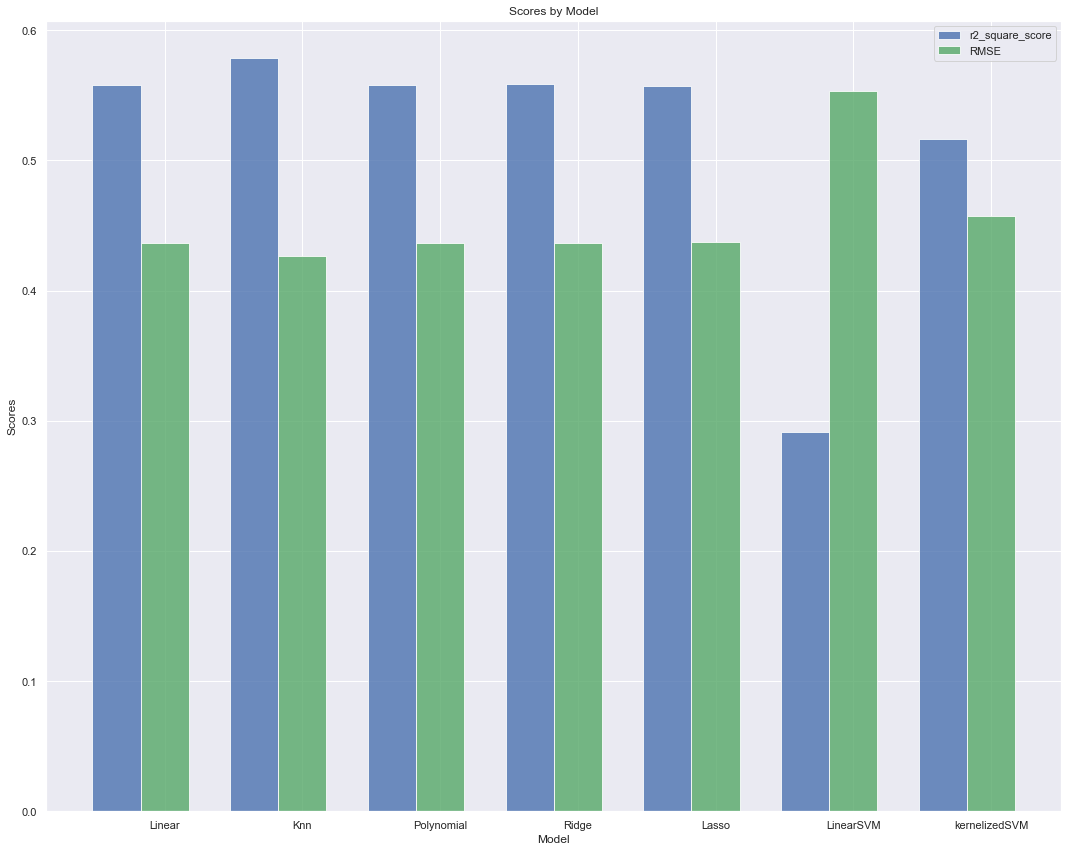

In [99]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
# data to plot
n_groups = 7
r2square_score = [r2square_Linear,r2square_KNN,r2square_Polynomial,r2square_Ridge,r2square_Lasso,r2square_LinearSVM,r2square_kernelizedSVM]
RMSE_score = [RMSE_Linear,RMSE_KNN,RMSE_Polynomial,RMSE_Ridge,RMSE_Lasso,RMSE_LinearSVM,RMSE_kernelizedSVM]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, r2square_score, bar_width,
alpha=opacity,
color='b',
label='r2_square_score')

rects2 = plt.bar(index + bar_width, RMSE_score, bar_width,
alpha=opacity,
color='g',
label='RMSE')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Scores by Model')
plt.xticks(index + bar_width, ('Linear', 'Knn','Polynomial','Ridge','Lasso','LinearSVM','kernelizedSVM'))
plt.legend()

plt.tight_layout()
plt.show()

# Based on the above accuracy score, the best classification model for our data set is KNN as the Train Accuracy has the highest accuracy score for predicting the value which is followed by Linear Regression